In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [4]:
data.duplicated().sum()

0

No duplicates so we can remove id

In [5]:
data.drop('id',axis=1,inplace=True)

In [6]:
data.tail(2)

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
2188  364    1022.3     16.4         15.2     13.8      14.7      92.0   93.0   
2189  365    1013.8     21.2         19.1     18.0      18.0      89.0   88.0   

      sunshine  winddirection  windspeed  rainfall  
2188       0.1           40.0       18.0         1  
2189       1.0           70.0       48.0         1

In [7]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2190 non-null   int64  
 1   pressure       2190 non-null   float64
 2   maxtemp        2190 non-null   float64
 3   temparature    2190 non-null   float64
 4   mintemp        2190 non-null   float64
 5   dewpoint       2190 non-null   float64
 6   humidity       2190 non-null   float64
 7   cloud          2190 non-null   float64
 8   sunshine       2190 non-null   float64
 9   winddirection  2190 non-null   float64
 10  windspeed      2190 non-null   float64
 11  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 205.4 KB


In [8]:
from warnings import filterwarnings
filterwarnings('ignore')

No object type present in the dataset

In [9]:
data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

Dataset is clean and no need for removing null values

In [10]:
data.describe()

day     pressure      maxtemp  temparature      mintemp  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean    179.948402  1013.602146    26.365799    23.953059    22.170091   
std     105.203592     5.655366     5.654330     5.222410     5.059120   
min       1.000000   999.000000    10.400000     7.400000     4.000000   
25%      89.000000  1008.600000    21.300000    19.300000    17.700000   
50%     178.500000  1013.000000    27.800000    25.500000    23.850000   
75%     270.000000  1017.775000    31.200000    28.400000    26.400000   
max     365.000000  1034.600000    36.000000    31.500000    29.800000   

          dewpoint     humidity        cloud     sunshine  winddirection  \
count  2190.000000  2190.000000  2190.000000  2190.000000    2190.000000   
mean     20.454566    82.036530    75.721918     3.744429     104.863151   
std       5.288406     7.800654    18.026498     3.626327      80.002416   
min      -0.300000    39.000000     2.000000     0.000000      10.000000   
25%      16.800000    77.000000    69.000000     0.400000      40.000000   
50%      22.150000    82.000000    83.000000     2.400000      70.000000   
75%      25.000000    88.000000    88.000000     6.800000     200.000000   
max      26.700000    98.000000   100.000000    12.100000     300.000000   

         windspeed     rainfall  
count  2190.000000  2190.000000  
mean     21.804703     0.753425  
std       9.898659     0.431116  
min       4.400000     0.000000  
25%      14.125000     1.000000  
50%      20.500000     1.000000  
75%      27.900000     1.000000  
max      59.500000     1.000000

Scaling is required in the dataset but first breaking in x and y

In [11]:
x=data.drop('rainfall',axis=1)
y=data['rainfall']

In [12]:
x.shape

(2190, 11)

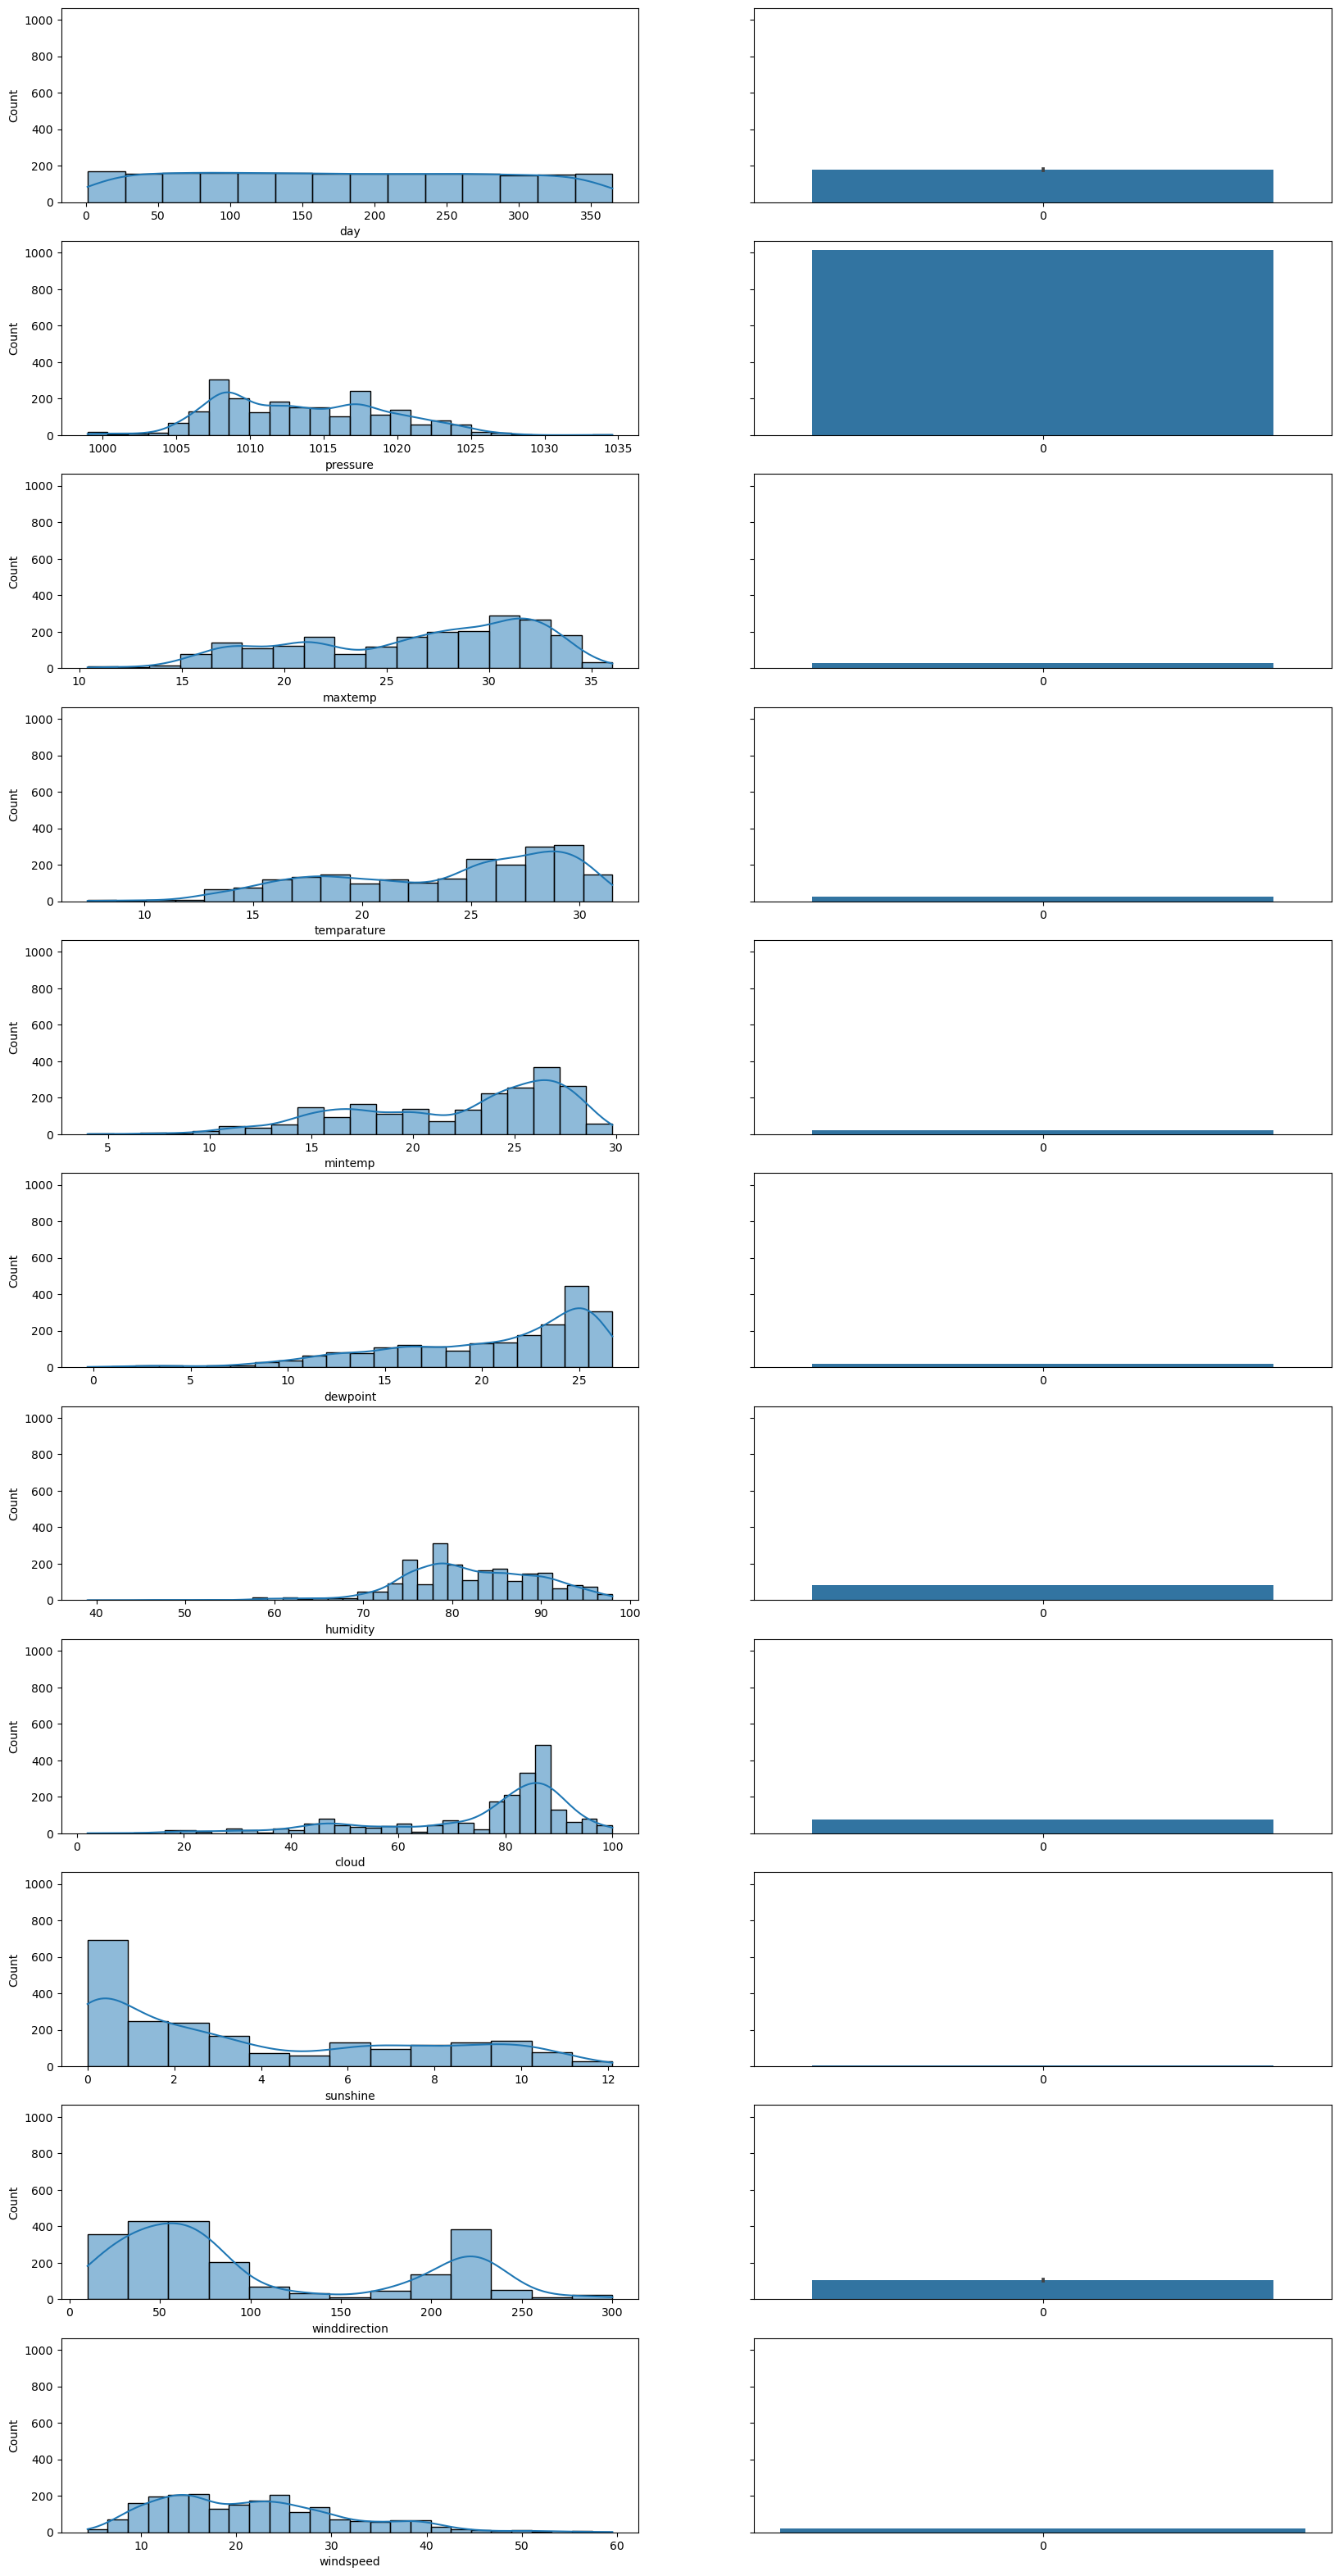

In [13]:
fig,axes=plt.subplots(11,2,figsize=(20,40),sharey=True)
for i in range(11):
        
    sns.histplot(x[x.columns[i]],ax=axes[i][0],kde=True)
    sns.barplot(x[x.columns[i]],ax=axes[i][1])
    plt.plot()

No outliers were detected

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [15]:
import joblib
joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']

In [16]:
x.describe()

day     pressure      maxtemp  temparature      mintemp  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean      0.491616     0.410173     0.623664     0.686849     0.704267   
std       0.289021     0.158859     0.220872     0.216698     0.196090   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.241758     0.269663     0.425781     0.493776     0.531008   
50%       0.487637     0.393258     0.679688     0.751037     0.769380   
75%       0.739011     0.527388     0.812500     0.871369     0.868217   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          dewpoint     humidity        cloud     sunshine  winddirection  \
count  2190.000000  2190.000000  2190.000000  2190.000000    2190.000000   
mean      0.768688     0.729433     0.752264     0.309457       0.327114   
std       0.195867     0.132214     0.183944     0.299696       0.275870   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.633333     0.644068     0.683673     0.033058       0.103448   
50%       0.831481     0.728814     0.826531     0.198347       0.206897   
75%       0.937037     0.830508     0.877551     0.561983       0.655172   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

         windspeed  
count  2190.000000  
mean      0.315875  
std       0.179649  
min       0.000000  
25%       0.176497  
50%       0.292196  
75%       0.426497  
max       1.000000

In [17]:
data.corr()

day  pressure   maxtemp  temparature   mintemp  dewpoint  \
day            1.000000  0.005337  0.146294     0.153590  0.161475  0.137929   
pressure       0.005337  1.000000 -0.800499    -0.816531 -0.814453 -0.817008   
maxtemp        0.146294 -0.800499  1.000000     0.982932  0.965529  0.906703   
temparature    0.153590 -0.816531  0.982932     1.000000  0.987150  0.933617   
mintemp        0.161475 -0.814453  0.965529     0.987150  1.000000  0.941342   
dewpoint       0.137929 -0.817008  0.906703     0.933617  0.941342  1.000000   
humidity      -0.074048 -0.119949 -0.072615    -0.025016  0.009891  0.153390   
cloud         -0.048175  0.098600 -0.289047    -0.249355 -0.219399 -0.088446   
sunshine       0.060936 -0.257163  0.452387     0.414019  0.379497  0.249676   
winddirection  0.024800 -0.643293  0.662235     0.668963  0.663828  0.643073   
windspeed     -0.000199  0.266012 -0.354168    -0.342262 -0.328871 -0.312179   
rainfall      -0.000462 -0.049886 -0.079304    -0.049660 -0.026841  0.081965   

               humidity     cloud  sunshine  winddirection  windspeed  \
day           -0.074048 -0.048175  0.060936       0.024800  -0.000199   
pressure      -0.119949  0.098600 -0.257163      -0.643293   0.266012   
maxtemp       -0.072615 -0.289047  0.452387       0.662235  -0.354168   
temparature   -0.025016 -0.249355  0.414019       0.668963  -0.342262   
mintemp        0.009891 -0.219399  0.379497       0.663828  -0.328871   
dewpoint       0.153390 -0.088446  0.249676       0.643073  -0.312179   
humidity       1.000000  0.584854 -0.541592      -0.012430   0.062285   
cloud          0.584854  1.000000 -0.805128      -0.127087   0.184698   
sunshine      -0.541592 -0.805128  1.000000       0.272235  -0.241752   
winddirection -0.012430 -0.127087  0.272235       1.000000  -0.192417   
windspeed      0.062285  0.184698 -0.241752      -0.192417   1.000000   
rainfall       0.454213  0.641191 -0.555287      -0.006939   0.111625   

               rainfall  
day           -0.000462  
pressure      -0.049886  
maxtemp       -0.079304  
temparature   -0.049660  
mintemp       -0.026841  
dewpoint       0.081965  
humidity       0.454213  
cloud          0.641191  
sunshine      -0.555287  
winddirection -0.006939  
windspeed      0.111625  
rainfall       1.000000

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import statsmodels.api as sm

# Add a constant column for statsmodels
x_with_const = sm.add_constant(x)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x_with_const.values, i+1) for i in range(len(x.columns))]

print(vif_data)

          Feature        VIF
0             day   1.103019
1        pressure   3.626572
2         maxtemp  33.115428
3     temparature  83.185519
4         mintemp  45.476645
5        dewpoint  11.918536
6        humidity   1.881132
7           cloud   3.189016
8        sunshine   3.564230
9   winddirection   1.941000
10      windspeed   1.167179


By Variance Inflation Factor(VIF) it i clear that maxtemp, temperature, mintemp and dewpoint are highly multicollinear and to deal with it while using the linear models we should use the regularization terms

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
x_train.size

16863

In [21]:
x_test.size

7227

In [22]:
y_train.value_counts()

rainfall
1    1160
0     373
Name: count, dtype: int64

Data is not balanced

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=4)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [24]:
y_train.value_counts()

rainfall
1    1160
0    1160
Name: count, dtype: int64

Now trying different classification models

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import learning_curve

In [26]:
from sklearn.model_selection import StratifiedKFold
def learn_curve(model):
    cv = StratifiedKFold(n_splits=5)
    # Compute learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, x_train, y_train, cv=cv, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Compute mean and standard deviation for training & validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")

    plt.plot(train_sizes, test_mean, "o-", color="red", label="Cross-Validation Score")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [27]:
def check(model):
    y_pred=model.predict(x_test)
    print("accuracy score",accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

In [65]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
print(cross_val_score(lr,x_train,y_train))

[0.83405172 0.84267241 0.8512931  0.83189655 0.83405172]


In [66]:
from sklearn.model_selection import GridSearchCV
parameters_logistic={
    'penalty':['l1', 'l2', 'elasticnet', None],
    'C':[1.0,0.01,0.001,0.0001,0.1],
    'solver': ["liblinear"],
}

logistic_cv= GridSearchCV(lr, parameters_logistic, cv=5)

logistic_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.01, 0.001, 0.0001, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear']})

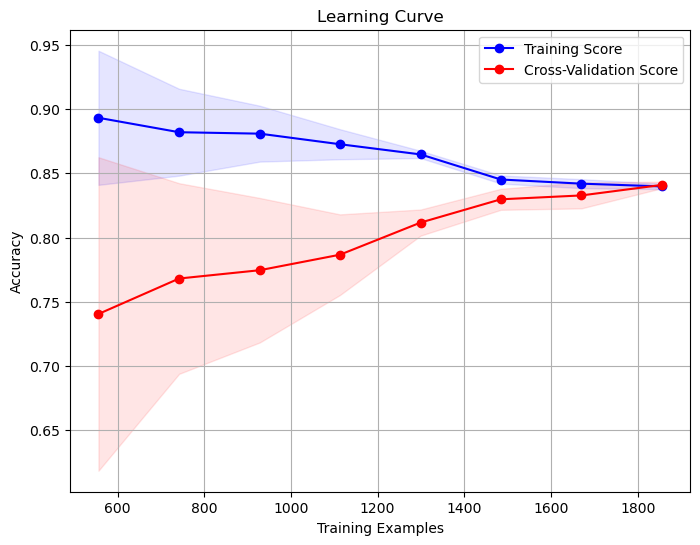

accuracy score 0.8310502283105022
[[121  46]
 [ 65 425]]


In [69]:
learn_curve(logistic_cv.best_estimator_)
check(logistic_cv.best_estimator_)

In [70]:
#performing well so we can save the model
import joblib
joblib.dump(logistic_cv.best_estimator_,'logistic.joblib')

['logistic.joblib']

In [75]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
print(cross_val_score(sgd,x_train,y_train))

[0.83836207 0.81681034 0.83836207 0.84267241 0.83189655]


In [76]:
parameters_sgd={
     "loss": ["hinge", "log_loss"],  # Hinge = SVM, log_loss = logistic regression
    "penalty": ["l1", "l2", "elasticnet"],
    "alpha": [1e-4, 1e-3, 1e-2, 1e-1],  # Regularization strength
    "learning_rate": ["constant", "optimal", "adaptive"],
    "eta0": [0.0001, 0.01, 0.1],  # Learning rate (for "constant" strategy)
    "max_iter": [1000, 5000, 10000]
}

sgd_cv=GridSearchCV(sgd,parameters_sgd,cv=5)

sgd_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'eta0': [0.0001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'adaptive'],
                         'loss': ['hinge', 'log_loss'],
                         'max_iter': [1000, 5000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet']})

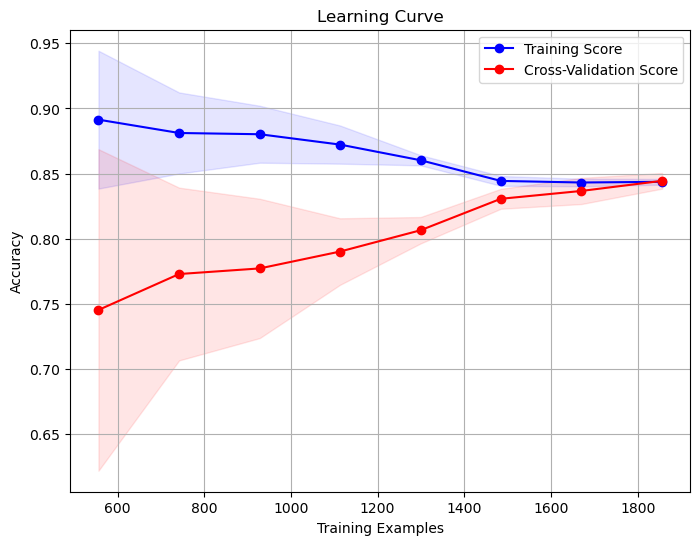

accuracy score 0.8310502283105022
[[118  49]
 [ 62 428]]


In [77]:
learn_curve(sgd_cv.best_estimator_)
check(sgd_cv.best_estimator_)

In [78]:
#ALike logistic regression but the precision score is somewhat higher so we can try it in test
joblib.dump(sgd_cv.best_estimator_,'sgd.joblib')

['sgd.joblib']

Now for Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
gauss_nb= GaussianNB()

print(cross_val_score(gauss_nb,x_train,y_train))

[0.81465517 0.82974138 0.82327586 0.83189655 0.8125    ]


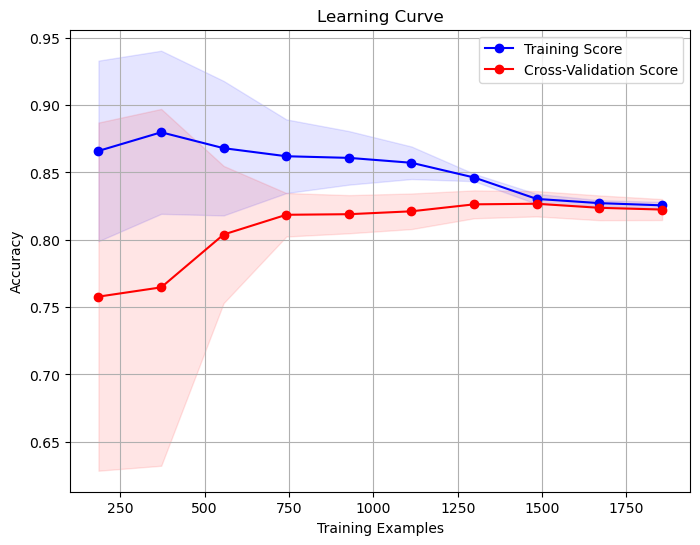

accuracy score 0.8127853881278538
[[125  42]
 [ 81 409]]


In [30]:
gauss_nb.fit(x_train,y_train)
learn_curve(gauss_nb)
check(gauss_nb)

In [33]:
#Performing good
import joblib
joblib.dump(gauss_nb,'gauss.joblib')

['gauss.joblib']

In [32]:
from sklearn.naive_bayes import BernoulliNB
print(cross_val_score(BernoulliNB(),x_train,y_train))

[0.57112069 0.57543103 0.60344828 0.58836207 0.58836207]


Now for SVM

In [34]:
from sklearn.svm import LinearSVC
linear_svc=LinearSVC()
print(cross_val_score(linear_svc,x_train,y_train))

[0.83405172 0.84267241 0.84051724 0.83405172 0.8362069 ]


In [36]:
from sklearn.model_selection import GridSearchCV
parameters_svc={
    "C": [0.001, 0.01, 0.1, 1],
    "loss": ["hinge", "squared_hinge"],
    'penalty': ['l1','l2'],
    'multi_class': ['ovr', 'crammer_singer'],
}

linear_svc_cv=GridSearchCV(linear_svc,parameters_svc)
linear_svc_cv.fit(x_train,y_train)

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']})

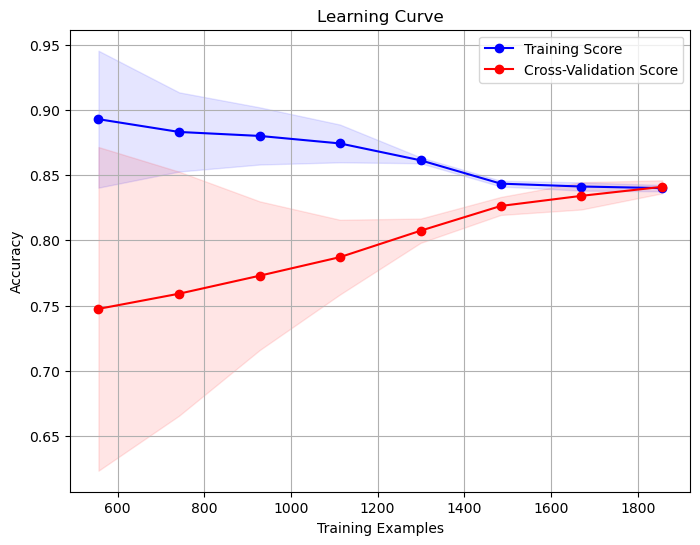

accuracy score 0.8280060882800608
[[121  46]
 [ 67 423]]


In [38]:
learn_curve(linear_svc_cv.best_estimator_)
check(linear_svc_cv.best_estimator_)

In [39]:
#performing good
import joblib
joblib.dump(linear_svc_cv.best_estimator_,'linear_svc.joblib')

['linear_svc.joblib']

In [40]:
#for SVC kernels
from sklearn.svm import SVC
svc= SVC()
print(cross_val_score(svc,x_train,y_train))

[0.8512931  0.8512931  0.85344828 0.86206897 0.84482759]


In [42]:
parameters_svc={
    'C':[0.0001,0.001,0.01,0.1,1.0],
    'kernel': ['linear', 'poly', 'rbf'],
    "gamma": ["scale", "auto", 0.01, 0.1],
    'degree': [3,4,5,6,7,8,9,10,11],
}

svc_cv=GridSearchCV(svc,parameters_svc)

svc_cv.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'degree': [3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'gamma': ['scale', 'auto', 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf']})

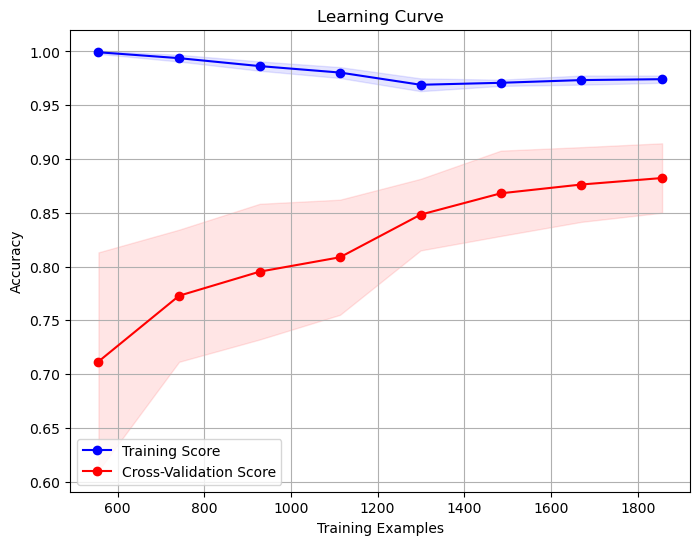

accuracy score 0.7960426179604262
[[104  63]
 [ 71 419]]


In [44]:
learn_curve(svc_cv.best_estimator_)
check(svc_cv.best_estimator_)

In [46]:
import joblib
joblib.dump(svc_cv.best_estimator_,'svc.joblib')

['svc.joblib']

In [47]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
print(cross_val_score(knn,x_train,y_train))

[0.84698276 0.85775862 0.85775862 0.86637931 0.86422414]


In [49]:
parameters_knn={
    "n_neighbors": [3, 5, 7, 9, 11, 15, 20],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"]
}

knn_cv=GridSearchCV(knn,parameters_knn)
knn_cv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
                         'weights': ['uniform', 'distance']})

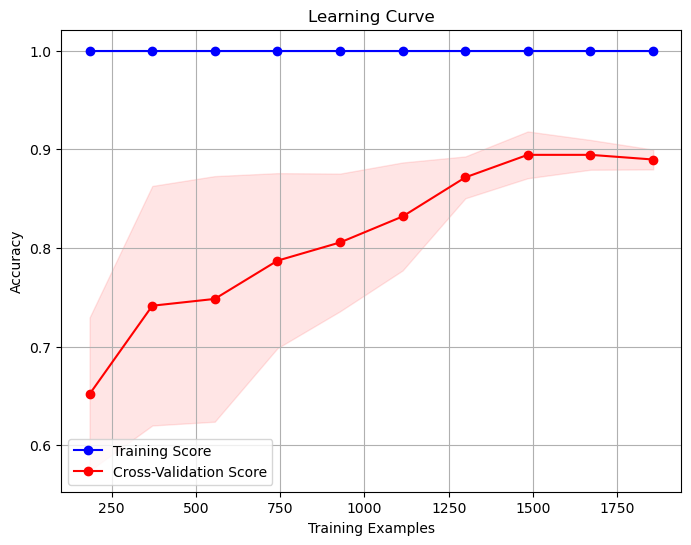

accuracy score 0.7945205479452054
[[121  46]
 [ 89 401]]


In [50]:
learn_curve(knn_cv.best_estimator_)
check(knn_cv.best_estimator_)

Underfitting the data

Ensemble techniques

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
print(cross_val_score(ada,x_train,y_train))

[0.84913793 0.84482759 0.86422414 0.84698276 0.84267241]


In [54]:
parameters_ada={
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.001, 0.01, 0.1, 1.0],
    "algorithm": ["SAMME", "SAMME.R"],
}
ada_cv=GridSearchCV(ada,parameters_ada)

ada_cv.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200, 300]})

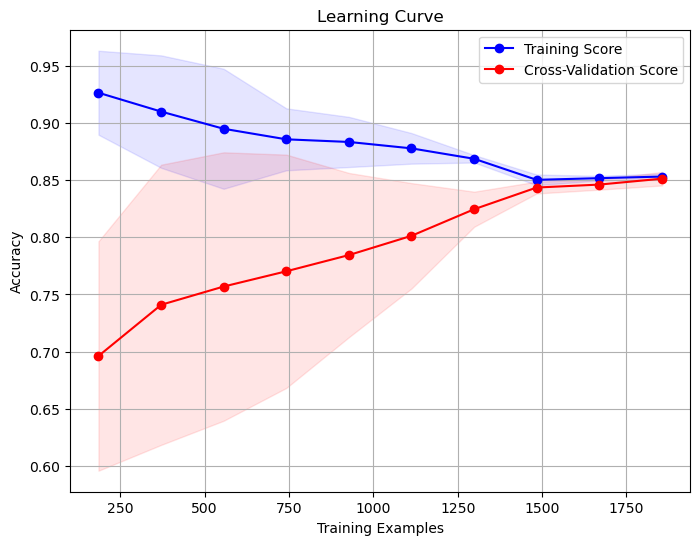

accuracy score 0.8143074581430746
[[120  47]
 [ 75 415]]


In [55]:
learn_curve(ada_cv.best_estimator_)
check(ada_cv.best_estimator_)

In [ ]:
import joblib
joblib.dump(ada_cv.best_estimator_,'ada.joblib')

In [56]:
import joblib
joblib.dump(ada_cv.best_estimator_,'ada.joblib')

['ada.joblib']

In [28]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
grad= GradientBoostingClassifier()

print(cross_val_score(grad,x_train,y_train))

[0.8362069  0.86853448 0.88793103 0.87284483 0.87931034]


In [29]:
from sklearn.model_selection import GridSearchCV
parameters_grad={
        'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'min_samples_split': [2, 5, 10],
    'loss':['log_loss', 'exponential'],
    'criterion':['friedman_mse', 'squared_error']
}

grad_cv= GridSearchCV(grad,parameters_grad)
grad_cv.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]})

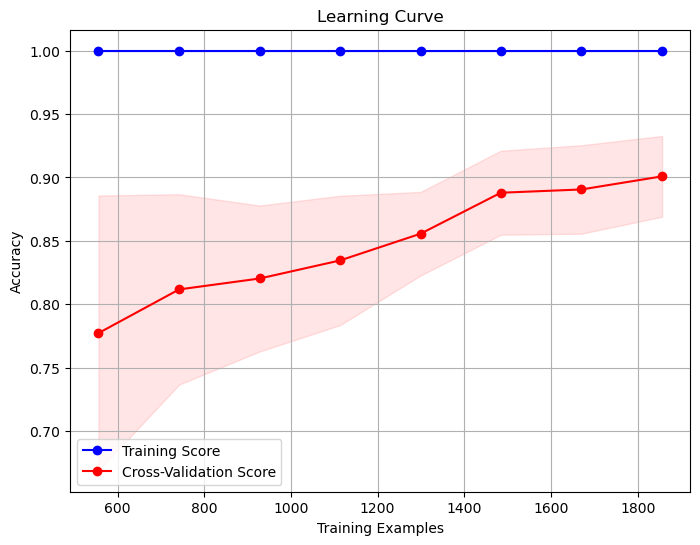

accuracy score 0.8310502283105022
[[100  67]
 [ 44 446]]


In [30]:
learn_curve(grad_cv.best_estimator_)
check(grad_cv.best_estimator_)

In [ ]:
import joblib
joblib.dump(grad_cv.best_estimator_,'grad.joblib')

Underfitting

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
print(cross_val_score(rf,x_train,y_train))

[0.875      0.87715517 0.90948276 0.91163793 0.91163793]


In [34]:
parameters_rf={
      'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_cv=GridSearchCV(rf,parameters_rf)
rf_cv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

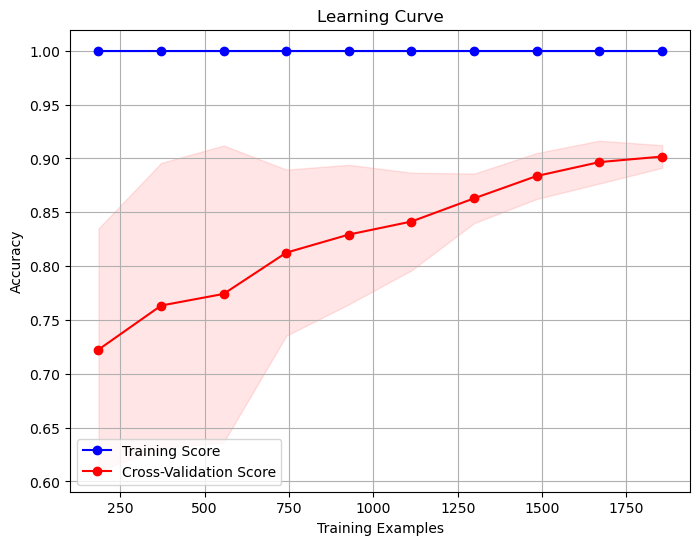

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [36]:
learn_curve(rf_cv.best_estimator_)
check(rf_cv.best_estimator_)

In [ ]:
import joblib
joblib.dump(rf_cv.best_estimator_,'rfc.joblib')

underfitting

In [38]:
#exta tree
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()
print(cross_val_score(ex,x_train,y_train))

[0.9137931  0.91163793 0.92241379 0.94396552 0.92025862]


In [40]:
parameters_ex={
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

ex_cv=GridSearchCV(ex,parameters_ex)
ex_cv.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

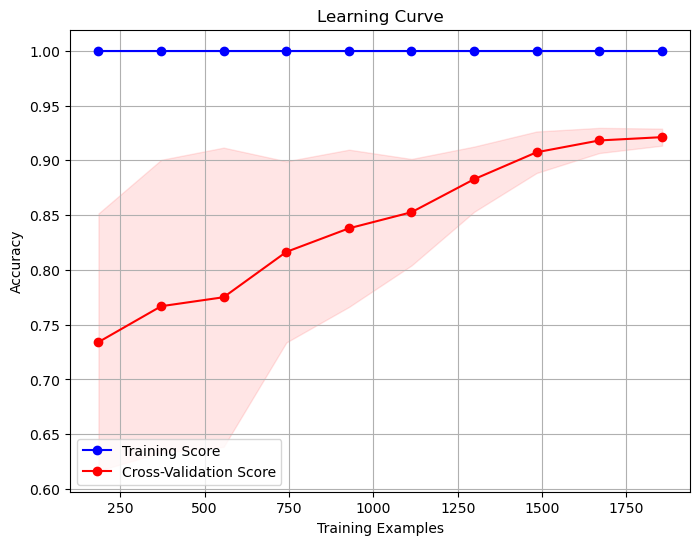

accuracy score 0.8447488584474886
[[109  58]
 [ 44 446]]


In [42]:
learn_curve(ex_cv.best_estimator_)
check(ex_cv.best_estimator_)

In [ ]:
import joblib
joblib.dump(ex_cv.best_estimator_,'extra_tree.joblib')

In [44]:
from sklearn.ensemble import HistGradientBoostingClassifier
hist=HistGradientBoostingClassifier()
print(cross_val_score(hist,x_train,y_train))

[0.87284483 0.87715517 0.92025862 0.92672414 0.90948276]


In [46]:
parameters_hist={
        'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 20],
    'max_bins': [255, 512],
    'l2_regularization': [0, 1, 10]
}

hist_cv=GridSearchCV(hist,parameters_hist)

hist_cv.fit(x_train,y_train)

GridSearchCV(estimator=HistGradientBoostingClassifier(),
             param_grid={'l2_regularization': [0, 1, 10],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_bins': [255, 512], 'max_depth': [3, 5, 7],
                         'max_iter': [100, 200, 300],
                         'min_samples_leaf': [5, 10, 20]})

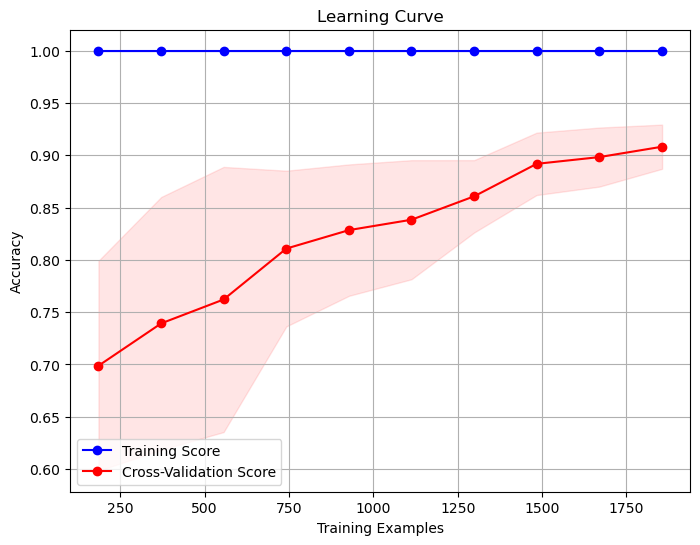

accuracy score 0.8386605783866058
[[102  65]
 [ 41 449]]


In [47]:
learn_curve(hist_cv.best_estimator_)
check(hist_cv.best_estimator_)

In [ ]:
import joblib
joblib.dump(hist_cv.best_estimator_,'hist.joblib')

underfitting

In [28]:
#xgboost
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
xgb=XGBClassifier()
print(cross_val_score(xgb,x_train,y_train))

[0.84267241 0.87284483 0.91810345 0.92456897 0.9137931 ]


In [29]:
from sklearn.model_selection import GridSearchCV
parameters_xgb={
      'n_estimators': [100, 200, 500],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Tree depth
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 1.0]  # Fraction of features used per tree
}
xgb_cv= GridSearchCV(xgb,parameters_xgb)
xgb_cv.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     lea...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.7, 0.8, 1.0]})

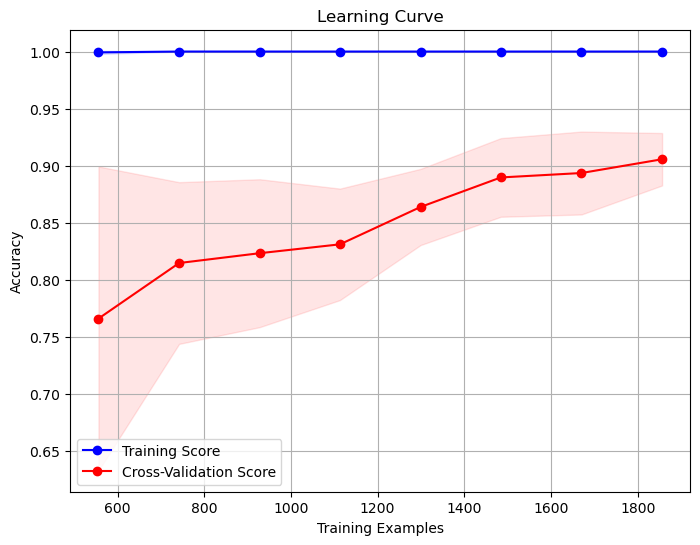

accuracy score 0.837138508371385
[[107  60]
 [ 47 443]]


In [30]:
learn_curve(xgb_cv.best_estimator_)
check(xgb_cv.best_estimator_)

In [ ]:
import joblib
joblib.dump(xgb_cv.best_estimator_,'xgb.joblib')

underfitting

In [ ]:
#cat boost
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
cat=CatBoostClassifier()
print(cross_val_score(cat,x_train,y_train))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters_cat={
   'iterations': np.arange(100, 500, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'depth': np.arange(4, 10),
    'l2_leaf_reg': np.logspace(-2, 2, 5),
    'border_count': [32, 64, 128],
    'bagging_temperature': np.linspace(0, 1, 5)
}

cat_cv=RandomizedSearchCV(cat,parameters_cat,random_state=42)
cat_cv.fit(x_train,y_train)

In [ ]:
learn_curve(cat_cv.best_estimator_)
check(cat_cv.best_estimator_)

In [ ]:
import joblib
joblib.dump(cat_cv.best_estimator_,'cat.joblib')

underfitting

In [33]:
#lightGBM
from lightgbm import LGBMClassifier
light=LGBMClassifier()
print(cross_val_score(light,x_train,y_train))

[LightGBM] [Info] Number of positive: 928, number of negative: 928
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2796
[LightGBM] [Info] Number of data points in the train set: 1856, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 928, number of negative: 928
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2780
[LightGBM] [Info] Number of data points in the train set: 1856, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 928, number of negative: 928
[

In [34]:
parameters_light={
        'num_leaves': np.arange(20, 150, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 15),
    'min_child_samples': np.arange(5, 50, 5),
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'reg_alpha': np.logspace(-2, 2, 5),
    'reg_lambda': np.logspace(-2, 2, 5)
}

light_cv=RandomizedSearchCV(light,parameters_light,random_state=42)
light_cv.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 928, number of negative: 928
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2796
[LightGBM] [Info] Number of data points in the train set: 1856, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

RandomizedSearchCV(estimator=LGBMClassifier(),
                   param_distributions={'colsample_bytree': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                                        'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_child_samples': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'num_leaves': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140]),
                                        'reg_alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'reg_lambda': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'subsample': array([0.5  , 0.625, 0.75 , 0.875, 1.   ])},
                   random_state=42)

[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 185
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 468
[LightGBM] [Info] Number of data points in the train set: 185, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there 

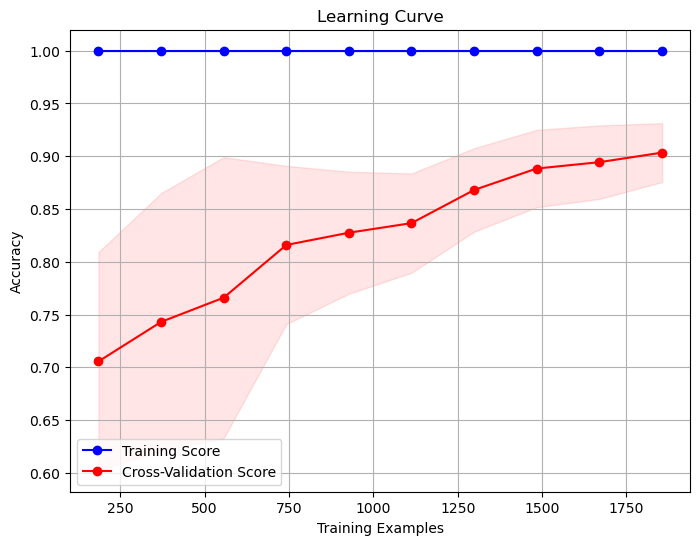

accuracy score 0.8310502283105022
[[106  61]
 [ 50 440]]


In [35]:
learn_curve(light_cv.best_estimator_)
check(light_cv.best_estimator_)

In [36]:
import joblib
joblib.dump(light_cv.best_estimator_,'light.joblib')

['light.joblib']

Underfitting

In [28]:
#VOting classifier: lightGBM+ Xgb+ catboost
import joblib
light=joblib.load('light.joblib')
cat=joblib.load('cat.joblib')
xgb=joblib.load('xgb.joblib')
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('cat', cat), ('lgbm', light), ('xgb', xgb)],
    voting='soft'
)
from sklearn.model_selection import cross_val_score
print(cross_val_score(voting_clf,x_train,y_train))
voting_clf.fit(x_train,y_train)

0:	learn: 0.5678455	total: 145ms	remaining: 50.7s
1:	learn: 0.4918670	total: 156ms	remaining: 27.2s
2:	learn: 0.4334041	total: 164ms	remaining: 18.9s
3:	learn: 0.3880083	total: 170ms	remaining: 14.7s
4:	learn: 0.3603503	total: 177ms	remaining: 12.2s
5:	learn: 0.3320516	total: 183ms	remaining: 10.5s
6:	learn: 0.3122387	total: 190ms	remaining: 9.32s
7:	learn: 0.2942827	total: 196ms	remaining: 8.38s
8:	learn: 0.2814962	total: 201ms	remaining: 7.6s
9:	learn: 0.2689151	total: 206ms	remaining: 7s
10:	learn: 0.2570711	total: 211ms	remaining: 6.51s
11:	learn: 0.2512581	total: 218ms	remaining: 6.13s
12:	learn: 0.2453886	total: 223ms	remaining: 5.79s
13:	learn: 0.2370553	total: 230ms	remaining: 5.51s
14:	learn: 0.2307915	total: 237ms	remaining: 5.3s
15:	learn: 0.2269418	total: 246ms	remaining: 5.14s
16:	learn: 0.2225970	total: 254ms	remaining: 4.97s
17:	learn: 0.2157278	total: 262ms	remaining: 4.83s
18:	learn: 0.2089313	total: 270ms	remaining: 4.7s
19:	learn: 0.2034466	total: 278ms	remaining: 4.

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x0000024FBB81C590>),
                             ('lgbm',
                              LGBMClassifier(colsample_bytree=0.625,
                                             learning_rate=0.10666666666666666,
                                             max_depth=7, min_child_samples=10,
                                             n_estimators=500, num_leaves=70,
                                             reg_alpha=0.1, reg_lambda=1.0,
                                             subsample=0.875)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=N...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [ ]:
learn_curve(voting_clf)
check(voting_clf)

In [29]:
joblib.dump(voting_clf,'voting.joblib')

['voting.joblib']